Tf ESTIMATOR 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
%matplotlib inline 
from sklearn.model_selection import train_test_split 

In [38]:
feat_cols = [tf.feature_column.numeric_column("x", shape = [1])]

In [39]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DEBANIK\\AppData\\Local\\Temp\\tmpmqfu5kw6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000029442E369E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5*x_data) + 5 + noise
x_df = pd.DataFrame(data = x_data, columns=["X Data"])
y_df = pd.DataFrame(data = y_true, columns=["Y"])
my_data = pd.concat([x_df,y_df],axis=1)

In [41]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [42]:
print(x_train.shape)

(700000,)


In [43]:
x_eval.shape

(300000,)

In [44]:
input_func  = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size = 8,num_epochs = None,shuffle  = True)

In [45]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size = 8,num_epochs = 1000,shuffle  = False)

In [46]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_eval},y_eval,batch_size = 8,num_epochs = 1000,shuffle  = False)

In [47]:
estimator.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEBANIK\AppData\Local\Temp\tmpmqfu5kw6\model.ckpt.
INFO:tensorflow:loss = 439.65704, step = 1
INFO:tensorflow:global_step/sec: 652.226
INFO:tensorflow:loss = 33.71427, step = 101 (0.158 sec)
INFO:tensorflow:global_step/sec: 821.749
INFO:tensorflow:loss = 18.848162, step = 201 (0.119 sec)
INFO:tensorflow:global_step/sec: 1095.45
INFO:tensorflow:loss = 23.349476, step = 301 (0.089 sec)
INFO:tensorflow:global_step/sec: 747.075
INFO:tensorflow:loss = 6.3243895, step = 401 (0.134 sec)
INFO:tensorflow:global_step/sec: 824.017
INFO:tensorflow:loss = 17.445236, step = 501 (0.121 sec)
INFO:tensorflow:global_step/sec: 1000.35
INFO:tensorflow:loss = 3.895507, step = 601 (0.116 sec)
INFO:tensorflow:global_step/

In [48]:
train_matrics = estimator.evaluate(input_fn = train_input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-20:55:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEBANIK\AppData\Local\Temp\tmpmqfu5kw6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-19-20:55:42
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0908467, global_step = 1000, label/mean = 7.5198627, loss = 8.726773, prediction/mean = 7.3772726
INFO:tensorflow:Saving 'checkpoint_pa

In [49]:
eval_matrics = estimator.evaluate(input_fn = eval_input_func,steps  = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-20:55:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEBANIK\AppData\Local\Temp\tmpmqfu5kw6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-19-20:55:44
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0905682, global_step = 1000, label/mean = 7.490747, loss = 8.7245455, prediction/mean = 7.355918
INFO:tensorflow:Saving 'checkpoint_pat

In [50]:
print("traning data metrics")
print(train_matrics)

traning data metrics
{'average_loss': 1.0908467, 'label/mean': 7.5198627, 'loss': 8.726773, 'prediction/mean': 7.3772726, 'global_step': 1000}


In [51]:
print("eval metrics")
print(eval_matrics)

eval metrics
{'average_loss': 1.0905682, 'label/mean': 7.490747, 'loss': 8.7245455, 'prediction/mean': 7.355918, 'global_step': 1000}


In [52]:
brand_new_data = np.linspace(0,10,10)

In [53]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({"x":brand_new_data},shuffle = False)

In [54]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEBANIK\AppData\Local\Temp\tmpmqfu5kw6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.422222], dtype=float32)},
 {'predictions': array([5.0786037], dtype=float32)},
 {'predictions': array([5.7349854], dtype=float32)},
 {'predictions': array([6.3913665], dtype=float32)},
 {'predictions': array([7.047748], dtype=float32)},
 {'predictions': array([7.704129], dtype=float32)},
 {'predictions': array([8.360511], dtype=float32)},
 {'predictions': array([9.016892], dtype=float32)},
 {'predictions': array([9.673274], dtype=float32)},
 {'predictions': array([10.329655], dtype=float32)}]

In [55]:
predictions = []



for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEBANIK\AppData\Local\Temp\tmpmqfu5kw6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions

[array([4.422222], dtype=float32),
 array([5.0786037], dtype=float32),
 array([5.7349854], dtype=float32),
 array([6.3913665], dtype=float32),
 array([7.047748], dtype=float32),
 array([7.704129], dtype=float32),
 array([8.360511], dtype=float32),
 array([9.016892], dtype=float32),
 array([9.673274], dtype=float32),
 array([10.329655], dtype=float32)]

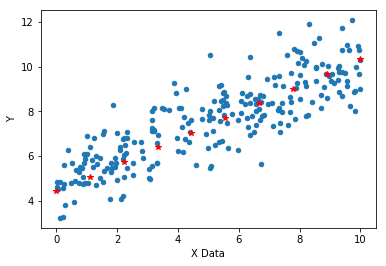

In [59]:
my_data.sample(n = 250).plot(kind = 'scatter', x = "X Data", y = "Y")
plt.plot(brand_new_data,predictions,"r*")